<a href="https://colab.research.google.com/github/3B032007/2025_ML_hws/blob/main/hw4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

# 1、讀入 CIFAR-10 數據集
CIFAR-10 是一個小尺吋（32x32）彩色圖片資料集，其中，訓練集包含了 50000 張大小為 32x32 的彩色圖片；測試集包含了 10000 張大小為 32x32 的彩色圖片。CIFAR-10 的圖片資料可分為以下 10 個種類：
* 飛機 (airplan)
* 交通工具 (automobile)
* 鳥 (bird)
* 貓 (cat)
* 鹿 (deer)
* 狗 (dog)
* 青蛙 (frog)
* 馬 (horse)
* 船 (ship)
* 卡車 (truck)

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


# 2、資料整理

資料尺寸與通道數（Channel）

由於 CNN 模型的輸入資料必須是圖片，所以我們需要注意一張圖有多少個 channel。


因為CIFAR-10資料集的資料為彩色圖片，每一個像素點，其實包含了紅色（Red）、綠色（Green）以及藍色（Blue）三原色的強度，所以每一張圖有三個 channel，以及代表三種顏色的強度。

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
print(f"資料的最小值: {np.min(x_train)}")
print(f"資料的最大值: {np.max(x_train)}")

資料的最小值: 0
資料的最大值: 255


In [7]:
print(f"資料的最小值: {np.min(x_test)}")
print(f"資料的最大值: {np.max(x_test)}")

資料的最小值: 0
資料的最大值: 255


In [8]:
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train.shape

(50000, 10)

In [10]:
# 資料類別標籤
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

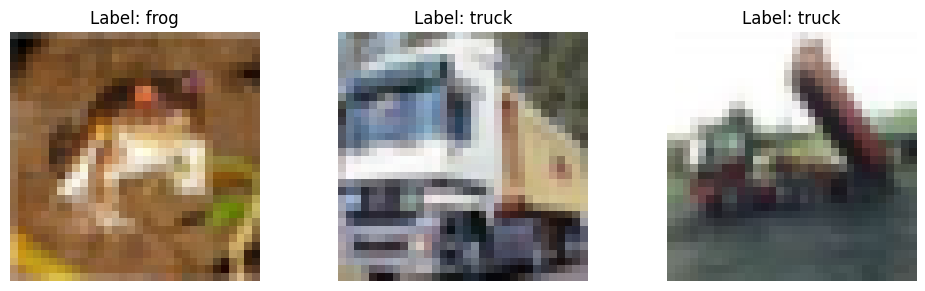

In [11]:
# 顯示三張訓練圖片與其標籤
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_train[i])
    label_index = np.argmax(y_train[i])  # 從 one-hot 還原 label 編號
    plt.title(f"Label: {class_names[label_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3、建立神經網路模型

In [12]:
model = Sequential()

In [13]:
# 第1層：Conv2D，輸入為 (32, 32, 3)
# 參數：16 x (3x3x3) + 16 = 448
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# 第2層：Conv2D
# 參數：16 x (3x3x16) + 16 = 2320
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

In [15]:
# 第3層：MaxPooling2D (2x2)
model.add(MaxPool2D(pool_size=(2, 2)))  # 輸出變成 (16, 16, 16)

In [16]:
# 第4層：Conv2D
# 參數：32 x (3x3x16) + 32 = 4640
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [17]:
# 第5層：Conv2D
# 參數：32 x (3x3x32) + 32 = 9248
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [18]:
# 第6層：MaxPooling2D (2x2)
model.add(MaxPool2D(pool_size=(2, 2)))  # 輸出變成 (8, 8, 32)

In [19]:
# 第7層：Flatten
model.add(Flatten())  # 輸出為 8*8*32 = 2048

In [20]:
# 第8層：Dense (輸出10類)
# 參數：2048 x 10 + 10 = 20490
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,146 (145.10 KB)

 Trainable params: 37,146 (145.10 KB)

 Non-trainable params: 0 (0.00 B)

# 4、組裝神經網路

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [23]:
train_history =model.fit( x_train, y_train ,validation_split=0.2,epochs=20 , batch_size=128,verbose=2)

Epoch 1/20
313/313 - 10s - 31ms/step - accuracy: 0.3979 - loss: 1.6758 - val_accuracy: 0.4981 - val_loss: 1.4097
Epoch 2/20
313/313 - 4s - 13ms/step - accuracy: 0.5424 - loss: 1.2884 - val_accuracy: 0.5772 - val_loss: 1.2033
Epoch 3/20
313/313 - 3s - 8ms/step - accuracy: 0.6022 - loss: 1.1280 - val_accuracy: 0.6189 - val_loss: 1.1000
Epoch 4/20
313/313 - 2s - 6ms/step - accuracy: 0.6404 - loss: 1.0291 - val_accuracy: 0.6299 - val_loss: 1.0712
Epoch 5/20
313/313 - 2s - 6ms/step - accuracy: 0.6671 - loss: 0.9586 - val_accuracy: 0.6649 - val_loss: 0.9749
Epoch 6/20
313/313 - 2s - 6ms/step - accuracy: 0.6867 - loss: 0.9023 - val_accuracy: 0.6588 - val_loss: 0.9853
Epoch 7/20
313/313 - 2s - 6ms/step - accuracy: 0.6988 - loss: 0.8694 - val_accuracy: 0.6718 - val_loss: 0.9630
Epoch 8/20
313/313 - 2s - 8ms/step - accuracy: 0.7151 - loss: 0.8266 - val_accuracy: 0.6836 - val_loss: 0.9173
Epoch 9/20
313/313 - 3s - 9ms/step - accuracy: 0.7261 - loss: 0.7936 - val_accuracy: 0.6942 - val_loss: 0.890

# 5、以折線圖顯示訓練過程的loss & accuracy

In [24]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

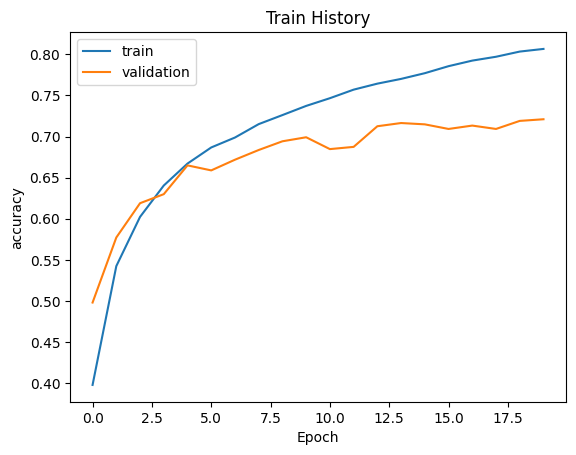

In [25]:
show_train_history(train_history,'accuracy','val_accuracy')

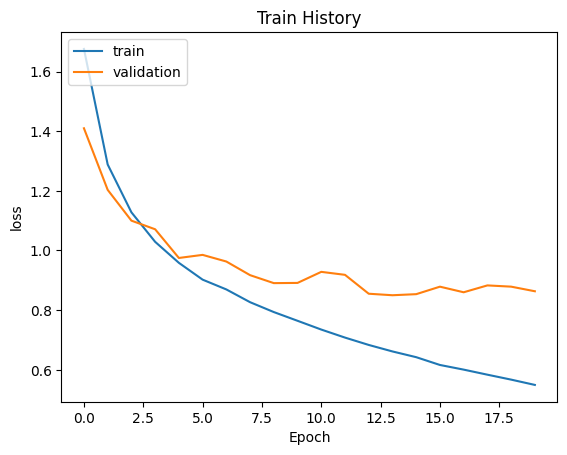

In [26]:
# 損失誤差loss
show_train_history(train_history,'loss','val_loss')

# 6、評估模型準確率

In [27]:
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7192 - loss: 0.8694

accuracy= 0.7128999829292297


# 7、進行預測

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


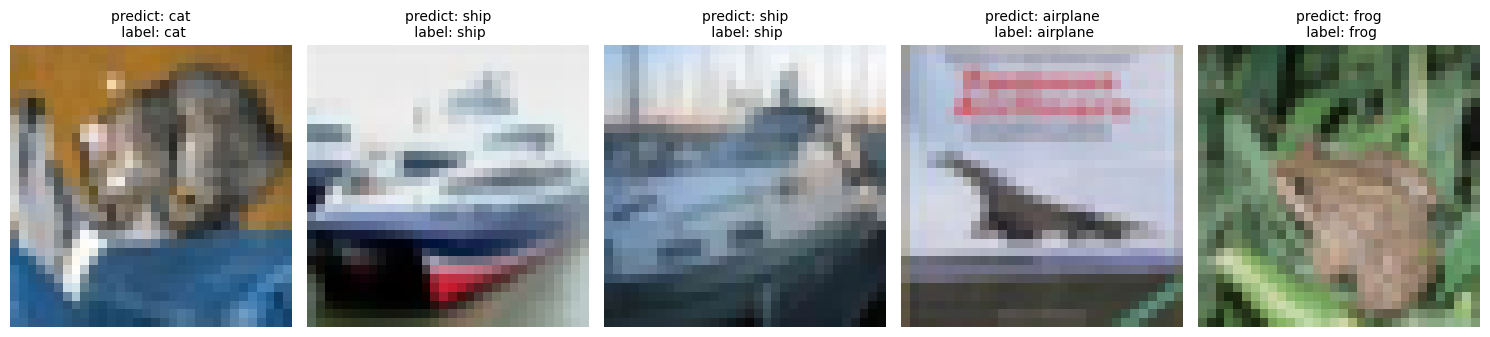

In [32]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# 顯示前 5 張圖片的預測結果與真實標籤
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    pred_label = class_names[y_pred_labels[i]]
    true_label = class_names[y_true_labels[i]]
    plt.title(f"predict: {pred_label}\n label: {true_label}", fontsize=10)
plt.tight_layout()
plt.show()

# 8、混淆矩陣(Confusion matrix)

In [36]:
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(x_test), axis=1)

pd.crosstab(y_true_labels,y_pred_labels,rownames=['label'],colnames=['predict'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,749,9,48,26,18,10,7,20,75,38
1,26,812,11,6,5,5,5,7,41,82
2,64,5,637,57,81,60,38,41,13,4
3,25,14,95,524,74,174,51,22,13,8
4,12,4,101,59,687,52,30,40,13,2
5,10,0,53,157,50,653,19,42,10,6
6,7,4,88,86,51,28,709,5,18,4
7,21,5,52,41,56,56,6,750,5,8
8,78,27,21,18,14,3,4,6,813,16


# 9、儲存完整模型

In [37]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks'

model.save('hw4-1.keras')

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# 10、interact_manual

In [43]:
from ipywidgets import interact_manual

y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(x_test), axis=1)

def test(test):
  plt.imshow(x_test[test], cmap='Greys')
  print('神經網路判斷為：', str(class_names[y_pred_labels[test]]))


interact_manual(test, test=(0, 9999))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


interactive(children=(IntSlider(value=4999, description='test', max=9999), Button(description='Run Interact', …

<function __main__.test(test)>